In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = "ignore")

In [3]:
df = pd.read_csv("/home/yeajin/Data_practice/Cleaned_Students_Performance.csv")
df.head()  #y = math_score

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [4]:
df = df.drop( columns=['total_score', 'average_score'])

# EDA & Data Preprocessing

## 1. 결측치 & 상관관계 확인

In [5]:
#데이터 정보 확인 & 결측치 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   int64 
 4   test_preparation_course      1000 non-null   int64 
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


,gender,lunch,test_preparation_course,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000


* 결측치 존재하지 않음
* 범주형 변수 (race_ethnicity, parental_level_of_education) 처리 필요

In [ ]:
#만약 결측치 존재한다면 
#결측치 데이터
missing = data.isnull().sum()

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')  #평균으로 채우기
#imp_mean = SimpleImputer( strategy='most_frequent')  #최빈값으로 채우기
#df.dropna(axis=0) #결측치있는 행 삭제
#df.fillna(0) #0으로 결측치 채우기
#df.fillna(method='ffill') #앞의 값으로 채우기
df = imp_mean.fit(df)

In [6]:
#상관관계 확인
df_corr = df.corr()
df_corr['math_score'].sort_values()

gender                     0.167982
test_preparation_course    0.177702
lunch                      0.350877
writing_score              0.802642
reading_score              0.817580
math_score                 1.000000
Name: math_score, dtype: float64

<AxesSubplot: >

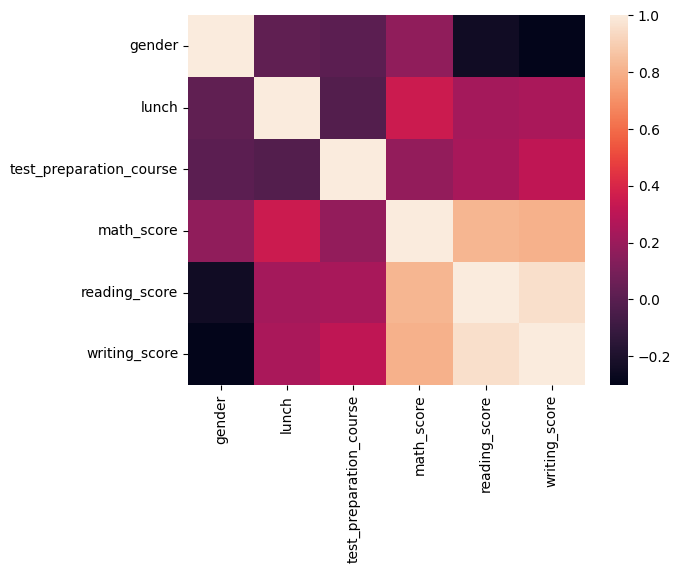

In [7]:
sns.heatmap(df_corr)

* score 변수들이 상관관계 높음
* gender, test_preparation_course 변수는 낮기는 하나 일단 포함

In [8]:
#타겟 변수 설정하기
y = df[['math_score']]
X= df.drop(["math_score"], axis= 1)

## 2. feature engineering - 범주형 변수

In [9]:
X.columns


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [10]:
#숫자형 /카테고리 변수 컬럼 추출
numerical_col = [col for col in X.columns if X[col].dtype != 'O']
categorical_col = [col for col in X.columns if X[col].dtype == 'O']

In [11]:
X[categorical_col].head()

,race_ethnicity,parental_level_of_education
0,group B,bachelor's degree
1,group C,some college
2,group B,master's degree
3,group A,associate's degree
4,group C,some college


In [12]:
#race_ethnicity 컬럼의 고유값
X['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

-> 원핫인코딩

In [13]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

encoder = LabelEncoder()
encoder.fit(list(X['race_ethnicity'].values))
X['race_ethnicity'] = encoder.transform(list(X['race_ethnicity'].values))

onehot = OneHotEncoder()

R = onehot.fit_transform(X['race_ethnicity'].values.reshape(-1,1)).toarray()

onehot_col = ['race_group' + str(i) for i in range(R.shape[-1])]
onehot_df = pd.DataFrame(R, columns=onehot_col)
X = pd.concat((X, onehot_df), axis=1).reset_index(drop=True)

X


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4
0,0,1,bachelor's degree,1,0,72,74,0.0,1.0,0.0,0.0,0.0
1,0,2,some college,1,1,90,88,0.0,0.0,1.0,0.0,0.0
2,0,1,master's degree,1,0,95,93,0.0,1.0,0.0,0.0,0.0
3,1,0,associate's degree,0,0,57,44,1.0,0.0,0.0,0.0,0.0
4,1,2,some college,1,0,78,75,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,1,1,99,95,0.0,0.0,0.0,0.0,1.0
996,1,2,high school,0,0,55,55,0.0,0.0,1.0,0.0,0.0
997,0,2,high school,0,1,71,65,0.0,0.0,1.0,0.0,0.0
998,0,3,some college,1,1,78,77,0.0,0.0,0.0,1.0,0.0


In [14]:
X = X.drop(['race_ethnicity'], axis=1)
X

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4
0,0,bachelor's degree,1,0,72,74,0.0,1.0,0.0,0.0,0.0
1,0,some college,1,1,90,88,0.0,0.0,1.0,0.0,0.0
2,0,master's degree,1,0,95,93,0.0,1.0,0.0,0.0,0.0
3,1,associate's degree,0,0,57,44,1.0,0.0,0.0,0.0,0.0
4,1,some college,1,0,78,75,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,master's degree,1,1,99,95,0.0,0.0,0.0,0.0,1.0
996,1,high school,0,0,55,55,0.0,0.0,1.0,0.0,0.0
997,0,high school,0,1,71,65,0.0,0.0,1.0,0.0,0.0
998,0,some college,1,1,78,77,0.0,0.0,0.0,1.0,0.0


In [15]:
#parental_level_of_education 컬럼의 고유값
X['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

some high school -> high school -> some college -> associate's degree -> bachelor's degree -> master's degree 순으로 좋은 값으로 바꾸기

In [16]:
X['parental_level_of_education'] = X['parental_level_of_education'].replace({'some high school':1, 'high school':2, 'some college':3, "associate's degree":4, "bachelor's degree":5, "master's degree":6})

X

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4
0,0,5,1,0,72,74,0.0,1.0,0.0,0.0,0.0
1,0,3,1,1,90,88,0.0,0.0,1.0,0.0,0.0
2,0,6,1,0,95,93,0.0,1.0,0.0,0.0,0.0
3,1,4,0,0,57,44,1.0,0.0,0.0,0.0,0.0
4,1,3,1,0,78,75,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,6,1,1,99,95,0.0,0.0,0.0,0.0,1.0
996,1,2,0,0,55,55,0.0,0.0,1.0,0.0,0.0
997,0,2,0,1,71,65,0.0,0.0,1.0,0.0,0.0
998,0,3,1,1,78,77,0.0,0.0,0.0,1.0,0.0


In [ ]:
#만약 데이터가 string일 때 
# X['Brand'] = X.CarName.str.extract('([A-Za-z]+)')  #CarName컬럼 값에서 첫 단어 추출 
# X['SecondWord'] = X.CarName.str.extract(r'^\S+\s+(\S+)')  #두번째 단어 추출

## 3. 추가 EDA

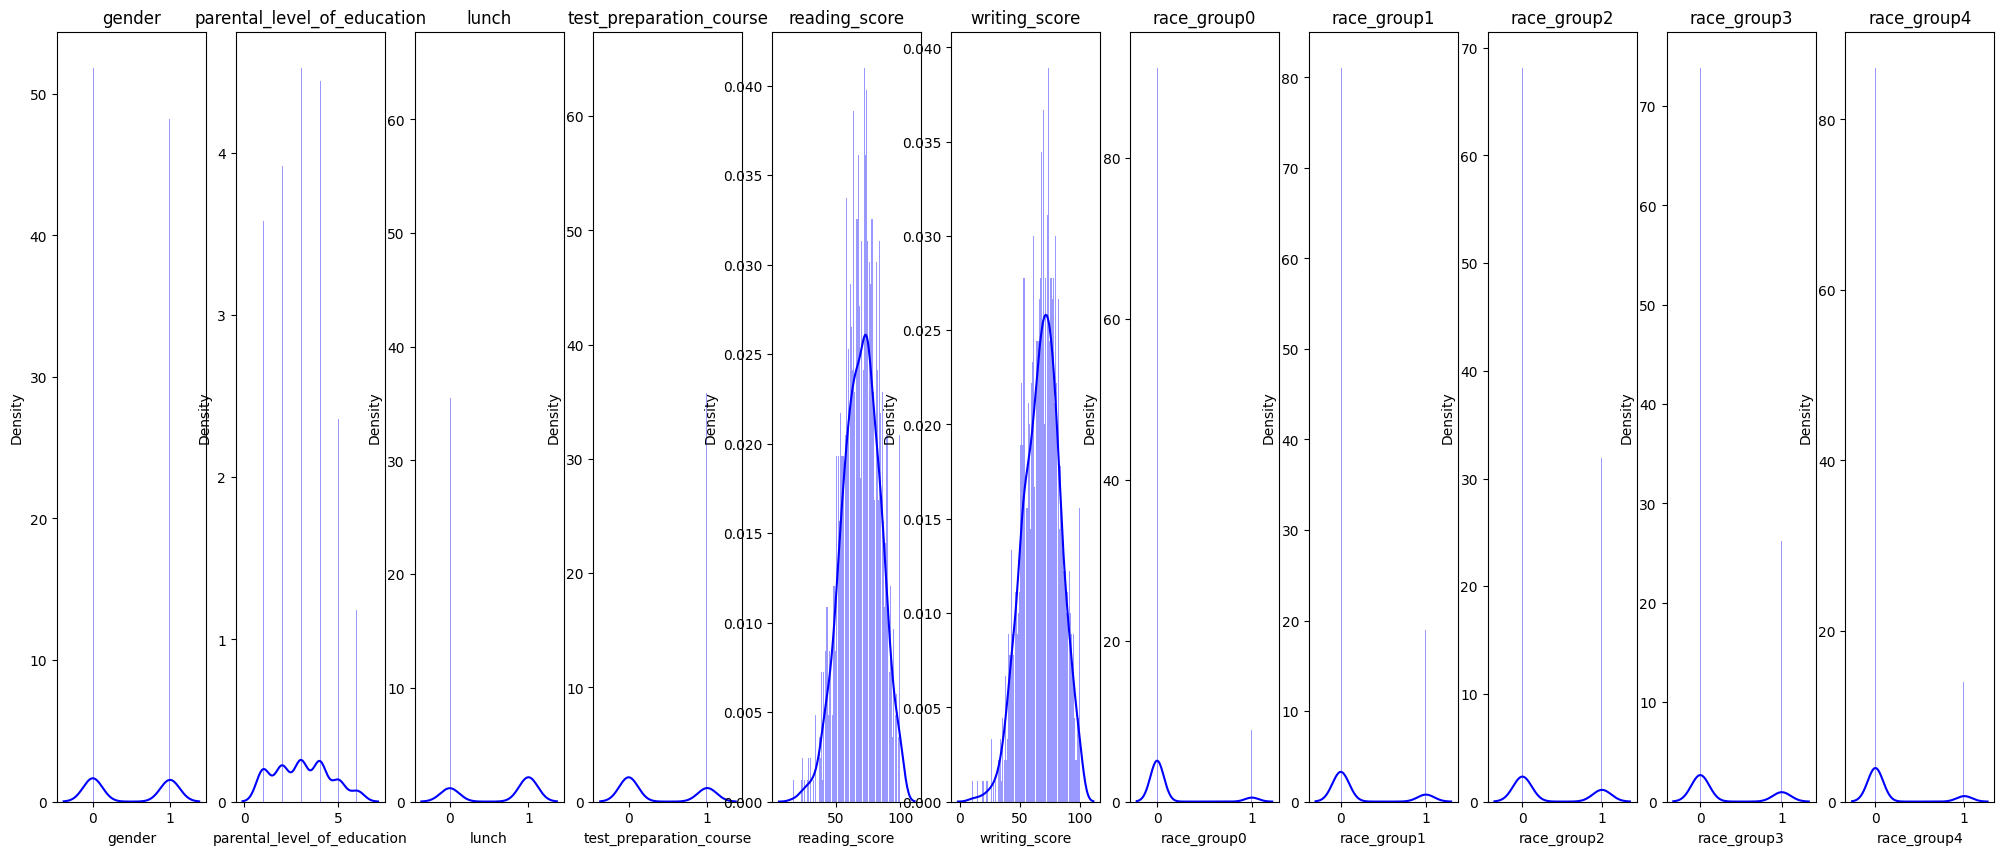

In [17]:
col = X.columns

fig, ax = plt.subplots(1, len(col), figsize=(25,10))

i = 1
for c in col:
    plt.subplot(1, len(col), i)
    sns.distplot(X[c], color='blue', kde=True, bins=100)
    plt.title(c)
    i += 1

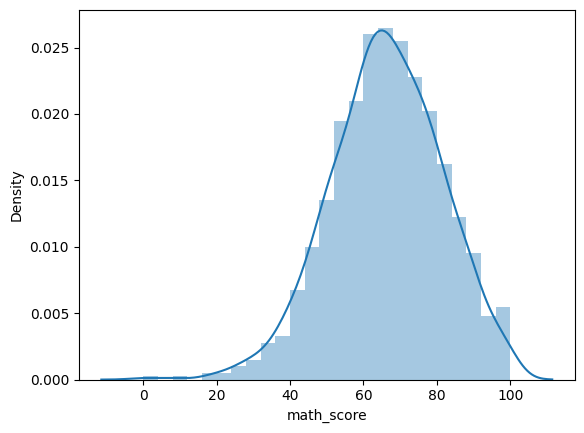

<Figure size 640x480 with 0 Axes>

In [30]:
#y값 분포 시각화
sns.distplot(y);

fig = plt.figure()
plt.show()

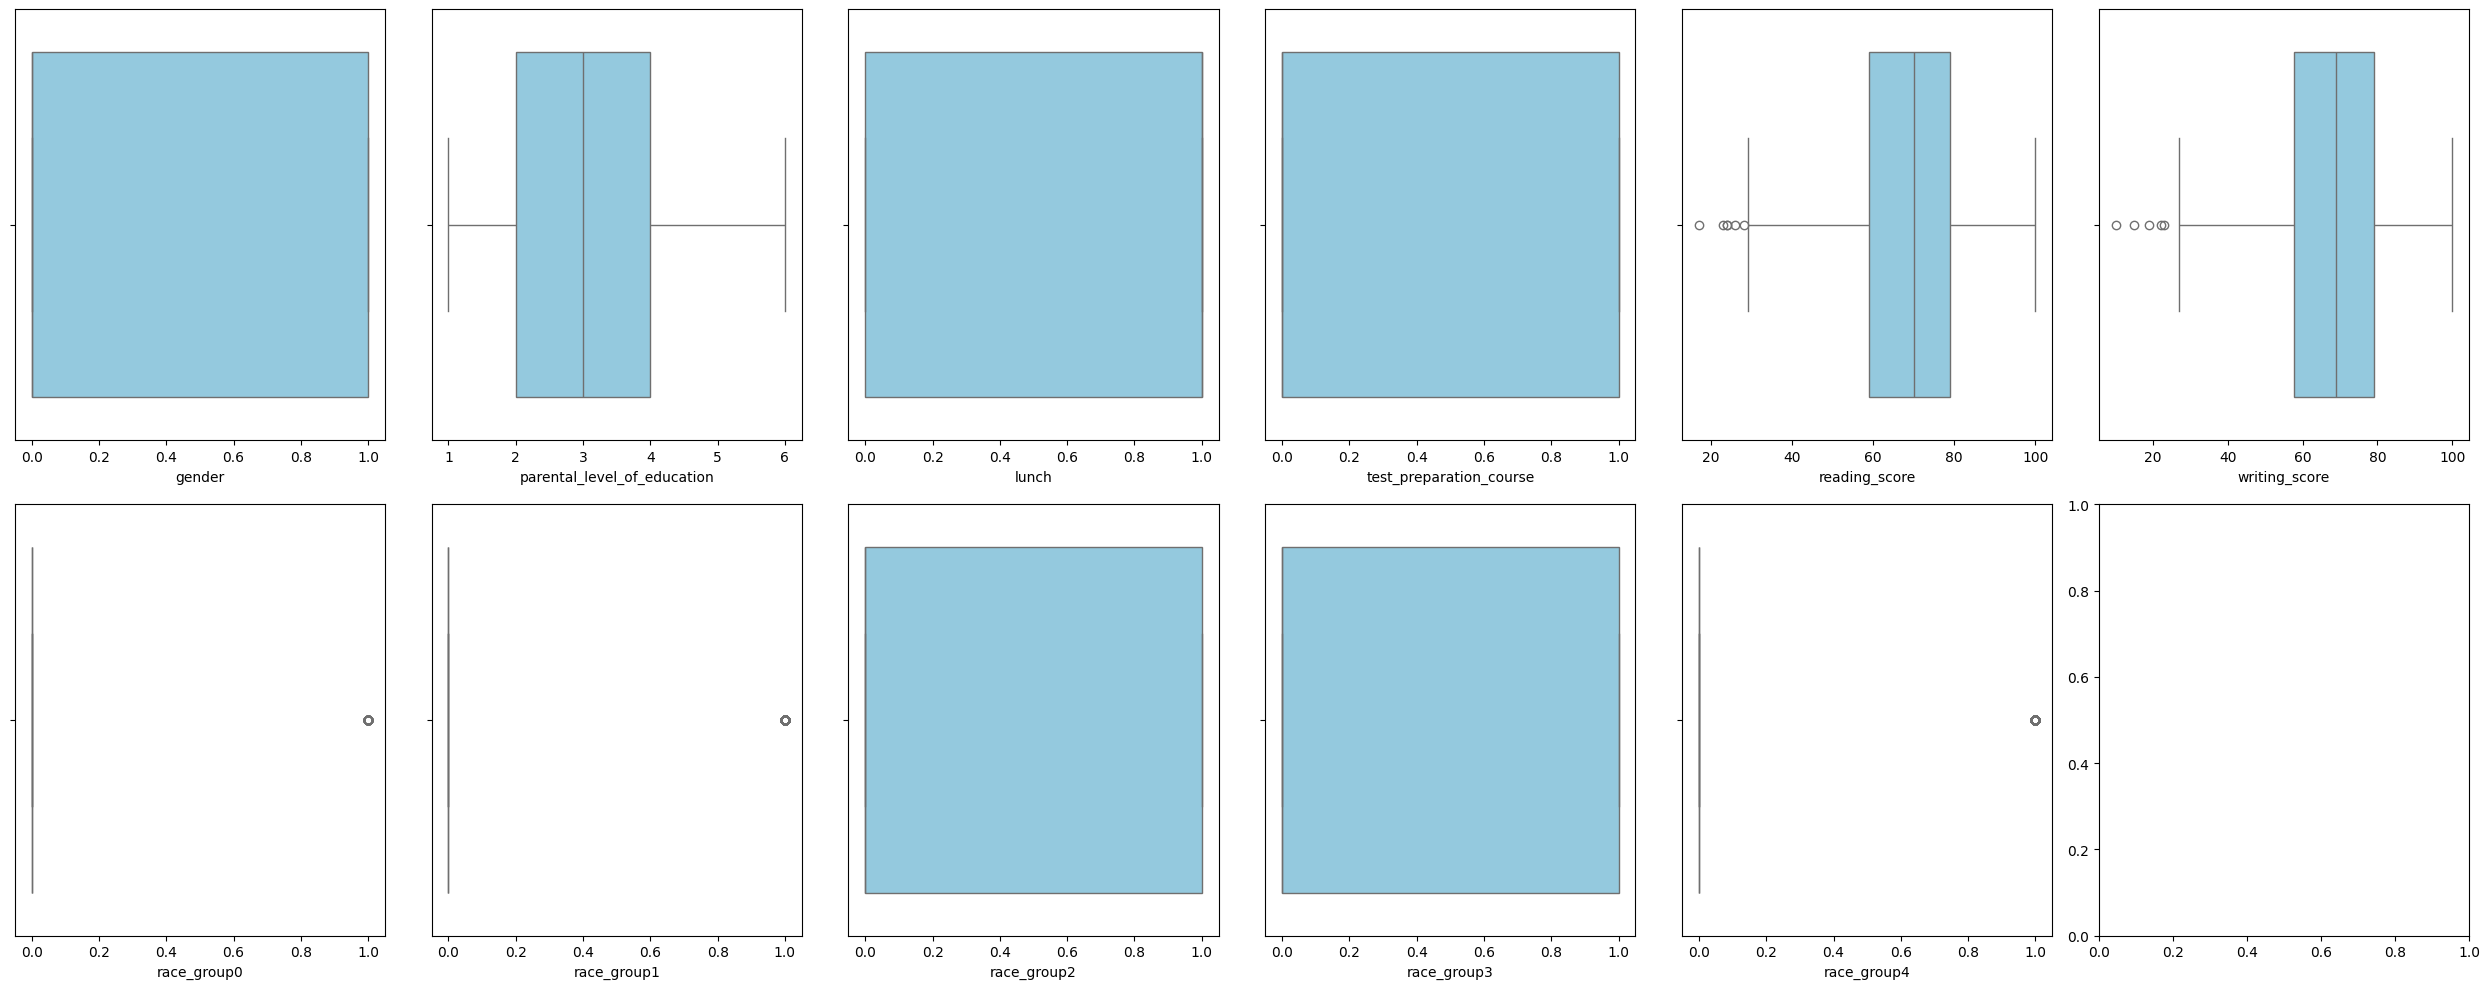

In [18]:
fig, axes = plt.subplots(2,6,figsize=(25,10))
for i , (c ,ax) in enumerate(zip(col , axes.flatten())):
    if i<len(col):
        sns.boxplot(x=X[c] , ax=ax , color='skyblue')
plt.tight_layout()
plt.show()

In [ ]:
# #infinite값 None으로 바꿔주기
# X.replace([np.inf, -np.inf], np.nan, inplace=True)

* parental_level_of_education, reading_score, writing_score 컬럼만 scaler적용할 필요 있어보임

In [19]:
scaler = MinMaxScaler()

scale_col = ['parental_level_of_education', 'reading_score', 'writing_score']
X[scale_col] = scaler.fit_transform(X[scale_col])

X

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4
0,0,0.8,1,0,0.662651,0.711111,0.0,1.0,0.0,0.0,0.0
1,0,0.4,1,1,0.879518,0.866667,0.0,0.0,1.0,0.0,0.0
2,0,1.0,1,0,0.939759,0.922222,0.0,1.0,0.0,0.0,0.0
3,1,0.6,0,0,0.481928,0.377778,1.0,0.0,0.0,0.0,0.0
4,1,0.4,1,0,0.734940,0.722222,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.0,1,1,0.987952,0.944444,0.0,0.0,0.0,0.0,1.0
996,1,0.2,0,0,0.457831,0.500000,0.0,0.0,1.0,0.0,0.0
997,0,0.2,0,1,0.650602,0.611111,0.0,0.0,1.0,0.0,0.0
998,0,0.4,1,1,0.734940,0.744444,0.0,0.0,0.0,1.0,0.0


# 모델링

In [20]:
X

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4
0,0,0.8,1,0,0.662651,0.711111,0.0,1.0,0.0,0.0,0.0
1,0,0.4,1,1,0.879518,0.866667,0.0,0.0,1.0,0.0,0.0
2,0,1.0,1,0,0.939759,0.922222,0.0,1.0,0.0,0.0,0.0
3,1,0.6,0,0,0.481928,0.377778,1.0,0.0,0.0,0.0,0.0
4,1,0.4,1,0,0.734940,0.722222,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.0,1,1,0.987952,0.944444,0.0,0.0,0.0,0.0,1.0
996,1,0.2,0,0,0.457831,0.500000,0.0,0.0,1.0,0.0,0.0
997,0,0.2,0,1,0.650602,0.611111,0.0,0.0,1.0,0.0,0.0
998,0,0.4,1,1,0.734940,0.744444,0.0,0.0,0.0,1.0,0.0


In [21]:
y = y.squeeze()

y.shape

(1000,)

In [31]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#중요한 변수 확인 --> reading_score, writing_score
sample_params = {
    'max_depth' : 11,
    'min_samples_leaf' : 3
    }

sample_model = GradientBoostingRegressor(**sample_params)


sample_model.fit(X_train, y_train)

pred_sample = sample_model.predict(X_test)

important_features = sample_model.feature_importances_
important_feat_df = pd.DataFrame(important_features.reshape(1,-1), columns=[col for col in X.columns])
important_feat_df

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4
0,0.138962,0.021937,0.015586,0.013322,0.52554,0.254974,0.001131,0.005639,0.007992,0.00466,0.010257


In [25]:
#주성분 분석 변수 추가 
engineering_candidate = ['reading_score', 'writing_score']

pca = PCA(n_components=2)

tmp = X.copy()

x_pca = pca.fit_transform(tmp)
pca_col = ['PCA_' + str(i) for i in range(x_pca.shape[-1])]   
pca_df = pd.DataFrame(x_pca, columns=pca_col).reset_index(drop=True)

X = pd.concat((X, pca_df), axis=1)
X

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4,PCA_0,PCA_1
0,0,0.8,1,0,0.662651,0.711111,0.0,1.0,0.0,0.0,0.0,-0.037240,-0.556010
1,0,0.4,1,1,0.879518,0.866667,0.0,0.0,1.0,0.0,0.0,0.940957,-0.275664
2,0,1.0,1,0,0.939759,0.922222,0.0,1.0,0.0,0.0,0.0,-0.013561,-0.623828
3,1,0.6,0,0,0.481928,0.377778,1.0,0.0,0.0,0.0,0.0,-0.335690,0.574374
4,1,0.4,1,0,0.734940,0.722222,0.0,0.0,1.0,0.0,0.0,0.462804,0.724837
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.0,1,1,0.987952,0.944444,0.0,0.0,0.0,0.0,1.0,0.169933,-0.591870
996,1,0.2,0,0,0.457831,0.500000,0.0,0.0,1.0,0.0,0.0,0.445729,0.781856
997,0,0.2,0,1,0.650602,0.611111,0.0,0.0,1.0,0.0,0.0,0.924433,-0.219747
998,0,0.4,1,1,0.734940,0.744444,0.0,0.0,0.0,1.0,0.0,-0.359025,-0.725302


In [26]:
X['mean'] = X[engineering_candidate].mean(axis=1)
X['std'] = X[engineering_candidate].std(axis=1)
X['min'] = X[engineering_candidate].min(axis=1)
X['max'] = X[engineering_candidate].max(axis=1)

X

,gender,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,race_group0,race_group1,race_group2,race_group3,race_group4,PCA_0,PCA_1,mean,std,min,max
0,0,0.8,1,0,0.662651,0.711111,0.0,1.0,0.0,0.0,0.0,-0.037240,-0.556010,0.686881,0.034267,0.662651,0.711111
1,0,0.4,1,1,0.879518,0.866667,0.0,0.0,1.0,0.0,0.0,0.940957,-0.275664,0.873092,0.009087,0.866667,0.879518
2,0,1.0,1,0,0.939759,0.922222,0.0,1.0,0.0,0.0,0.0,-0.013561,-0.623828,0.930991,0.012400,0.922222,0.939759
3,1,0.6,0,0,0.481928,0.377778,1.0,0.0,0.0,0.0,0.0,-0.335690,0.574374,0.429853,0.073645,0.377778,0.481928
4,1,0.4,1,0,0.734940,0.722222,0.0,0.0,1.0,0.0,0.0,0.462804,0.724837,0.728581,0.008993,0.722222,0.734940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1.0,1,1,0.987952,0.944444,0.0,0.0,0.0,0.0,1.0,0.169933,-0.591870,0.966198,0.030764,0.944444,0.987952
996,1,0.2,0,0,0.457831,0.500000,0.0,0.0,1.0,0.0,0.0,0.445729,0.781856,0.478916,0.029818,0.457831,0.500000
997,0,0.2,0,1,0.650602,0.611111,0.0,0.0,1.0,0.0,0.0,0.924433,-0.219747,0.630857,0.027925,0.611111,0.650602
998,0,0.4,1,1,0.734940,0.744444,0.0,0.0,0.0,1.0,0.0,-0.359025,-0.725302,0.739692,0.006721,0.734940,0.744444


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
LR = LinearRegression()
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()
La = Lasso()
Ri = Ridge()

In [87]:
models = [LR,RFR, GBR, La, Ri]
rmses, maes, r2s = [], [], []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse =np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)
    
results_df = pd.DataFrame({"RMSE": rmses, "MAE": maes, "R2": r2s},
    index=[type(model).__name__ for model in models]).sort_values(by="R2", ascending=False)

results_df

,RMSE,MAE,R2
Ridge,5.391520,4.206099,0.880543
LinearRegression,5.412516,4.212500,0.879611
GradientBoostingRegressor,5.580947,4.338113,0.872001
RandomForestRegressor,6.190322,4.753521,0.842523
ExtraTreesRegressor,6.466749,4.987050,0.828145
DecisionTreeRegressor,7.996874,6.300000,0.737197
MLPRegressor,9.522752,7.443019,0.627339
Lasso,9.583919,7.547819,0.622536
KNeighborsRegressor,9.679081,7.475000,0.615003
ElasticNet,14.389982,11.297825,0.149039


In [88]:
#하이퍼파라미터 튜닝 방법:grid
from sklearn.model_selection import GridSearchCV

In [89]:
#model 정의
models = {
    'LinearRegression': (LinearRegression(), {
        'fit_intercept': [True, False],
        'positive': [True, False]
    }),
    'GradientBoostingRegressor': (GradientBoostingRegressor(), {
        'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200, 500],
        'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
        'max_depth': np.arange(1, 33)
    }),
    'Ridge': (Ridge(), {
        'alpha': (0.01, 1.0, 'log-uniform')
    })
}


#RF 파라미터
# rf = RandomForestRegressor()
# params = {
#     'n_estimators': [50, 100, 200, 300],
#     'max_depth': [None, 1, 2, 5, 10, 20],
#     'min_samples_split': [2, 5, 10, 100],
# }

In [90]:
model_results = []

# 모델별로 튜닝 및 적합
for model_name, (model, param_grid) in models.items():
    print(f"Start {model_name} Training!")
    search = GridSearchCV(model, param_grid, scoring='r2',  n_jobs=-1)
    search.fit(X_train, y_train)

    # 최적의 모델과 하이퍼파라미터 출력
    best_model =search.best_estimator_
    best_params =search.best_params_
    print(f"Best Parameters: {best_params}")

    # 테스트 데이터에 대한 예측 및 평가
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"rmse: {rmse}\n")
    # 모델 이름과 accuracy 결과 저장
    model_results.append((model_name, rmse))

Start LinearRegression Training!
Best Parameters: {'fit_intercept': True, 'positive': False}
rmse: 5.412516238428297

Start GradientBoostingRegressor Training!
Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
rmse: 5.403143098131343

Start Ridge Training!
Best Parameters: {'alpha': 0.01}
rmse: 5.367343593078324



In [81]:
train_preds = np.zeros((1, len(X_train)))
test_preds = np.zeros((1, len(X_test)))
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for j, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
        X_train2, X_val2 = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
        y_train2, y_val2 = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model = LinearRegression(fit_intercept=True, positive=False)
        model.fit(X_train2, y_train2)
        
        val_pred = model.predict(X_val2)
        y_pred = model.predict(X_val2)
        score = mean_squared_error(y_val2, y_pred)
        scores.append(score)
        
        train_preds[0][test_idx] += val_pred
        test_preds += (model.predict(X_test)/5)
        print(f"Fold {j+1} accuracy: {score}")
        
print()

print(f"Mean RMSE: {np.mean(scores)}")

Fold 1 accuracy: 29.998486328125
Fold 2 accuracy: 34.06414794921875
Fold 3 accuracy: 25.64378433227539
Fold 4 accuracy: 28.557281494140625
Fold 5 accuracy: 28.564630126953126

Mean RMSE: 29.365666046142575


In [84]:
train_preds2 = np.zeros((1, len(X_train)))
test_preds2 = np.zeros((1, len(X_test)))
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for j, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
        X_train2, X_val2 = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
        y_train2, y_val2 = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model = GradientBoostingRegressor(learning_rate=0.1, max_depth=1, n_estimators=500)
        model.fit(X_train2, y_train2)
        
        val_pred = model.predict(X_val2)
        y_pred = model.predict(X_val2)
        score = mean_squared_error(y_val2, y_pred)
        scores.append(score)
        
        train_preds2[0][test_idx] += val_pred
        test_preds2 += (model.predict(X_test)/5)
        print(f"Fold {j+1} accuracy: {score}")
        
print()

print(f"Mean RMSE: {np.mean(scores)}")

Fold 1 accuracy: 33.10502301504722
Fold 2 accuracy: 36.63059666016492
Fold 3 accuracy: 32.8129532771507
Fold 4 accuracy: 31.888480852958004
Fold 5 accuracy: 29.684563154408387

Mean RMSE: 32.824323391945846


In [85]:
train_preds3 = np.zeros((1, len(X_train)))
test_preds3 = np.zeros((1, len(X_test)))
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for j, (train_idx, test_idx) in enumerate(kfold.split(X_train, y_train)):
        X_train2, X_val2 = X_train.iloc[train_idx, :], X_train.iloc[test_idx, :]
        y_train2, y_val2 = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model = Ridge(alpha=0.01)
        model.fit(X_train2, y_train2)
        
        val_pred = model.predict(X_val2)
        y_pred = model.predict(X_val2)
        score = mean_squared_error(y_val2, y_pred)
        scores.append(score)
        
        train_preds3[0][test_idx] += val_pred
        test_preds3 += (model.predict(X_test)/5)
        print(f"Fold {j+1} accuracy: {score}")
        
print()

print(f"Mean RMSE: {np.mean(scores)}")

Fold 1 accuracy: 29.699069649764976
Fold 2 accuracy: 34.06858612840235
Fold 3 accuracy: 25.608415429756597
Fold 4 accuracy: 28.65409717092509
Fold 5 accuracy: 28.1384093022524

Mean RMSE: 29.233715536220284


In [86]:
train_pred_pre = np.concatenate((train_preds.reshape(-1,1), train_preds2.reshape(-1,1), train_preds3.reshape(-1,1)), axis=1)
test_pred_pre = np.concatenate((test_preds.reshape(-1,1), test_preds2.reshape(-1,1), test_preds3.reshape(-1,1)), axis=1)

In [87]:
train_pred_pre.shape

(800, 3)

In [92]:
final_train = np.zeros((1, len(X_train)))
final_test = np.zeros((1, len(X_test)))
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

train_pred_pre = np.concatenate((train_preds.reshape(-1,1), train_preds2.reshape(-1,1), train_preds3.reshape(-1,1)), axis=1)
test_pred_pre = np.concatenate((test_preds.reshape(-1,1), test_preds2.reshape(-1,1), test_preds3.reshape(-1,1)), axis=1)

for j, (train_idx, test_idx) in enumerate(kfold.split(train_pred_pre, y_train)):
        X_train2, X_val2 = train_pred_pre[train_idx], train_pred_pre[test_idx]
        y_train2, y_val2 = y_train.iloc[train_idx], y_train.iloc[test_idx]
        
        model =  LinearRegression()
        model.fit(X_train2, y_train2)
        
        val_pred = model.predict(X_val2)
        y_pred = model.predict(X_val2)
        score = mean_squared_error(y_val2, y_pred)
        scores.append(score)
        
        final_train[0][test_idx] += val_pred
        final_test += (model.predict(test_pred_pre)/5)
        print(f"Fold {j+1} accuracy: {score}")
        
print()

print(f"Mean RMSE: {np.mean(scores)}")

Fold 1 accuracy: 29.87546100601272
Fold 2 accuracy: 34.378219460072
Fold 3 accuracy: 26.1638868957691
Fold 4 accuracy: 29.526843446121443
Fold 5 accuracy: 28.341485509909084

Mean RMSE: 29.65717926357687


In [98]:
final_test.shape

(1, 200)

In [101]:
submission = pd.DataFrame({
#    "True Value": y_test.values,
    "math_score": final_test[0]
})

In [102]:
submission

,math_score
0,76.114868
1,58.129876
2,77.365815
3,76.270006
4,87.061901
...,...
195,43.644939
196,62.231617
197,67.455376
198,67.093118


In [ ]:
submission.to_csv("submission.csv", index=False)